
## Finding the minimum of a smooth function

Demos various methods to find the minimum of a function.

SciPy optimize provides functions for minimizing (or maximizing) objective functions, possibly subject to constraints. It includes solvers for nonlinear problems (with support for both local and global optimization algorithms), linear programing, constrained and nonlinear least-squares, root finding and curve fitting.

1. Scalar Functions Optimization
2. Local (Multivariate) Optimization
3. Global Optimization
4. Least-squares and Curve Fitting
5. Root finding

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Example 1: 

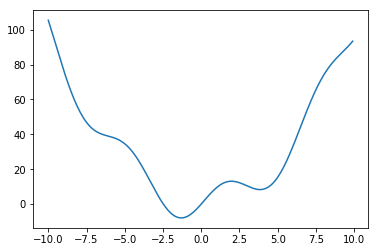

In [2]:
def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))

Now find the minimum with a few methods



In [3]:
from scipy import optimize

# The default (Nelder Mead)
print(optimize.minimize(f, x0=0))

      fun: -7.945823375615215
 hess_inv: array([[0.08589237]])
      jac: array([-1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-1.30644012])


In [4]:
print(optimize.minimize(f, x0=0, method="L-BFGS-B"))

      fun: array([-7.94582338])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.42108547e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 5
   status: 0
  success: True
        x: array([-1.30644013])


### Example 2: 

![img](img/optm1.png)

In [3]:
from scipy.optimize import minimize

def objective(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_eq = 40.0
    for i in range(4):
        sum_eq = sum_eq - x[i]**2
    return sum_eq


In [7]:
# initial guesses
x0 = np.array([1.0,5.0,5.0,1.0])

In [8]:
# show initial objective
print('Initial Objective: ' + str(objective(x0)))

# optimize
b = (1.0,5.0)
bnds = (b, b, b, b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])

solution = minimize(objective,x0,method='SLSQP',\
                    bounds=bnds,constraints=cons)

Initial Objective: 16.0


In [9]:
x = solution.x

# show final objective
print('Final Objective: ' + str(objective(x)))

# print solution
print('Solution')
print('x1 = ' + str(x[0]))
print('x2 = ' + str(x[1]))
print('x3 = ' + str(x[2]))
print('x4 = ' + str(x[3]))


Final Objective: 17.01401724563517
Solution
x1 = 1.0
x2 = 4.742996096883977
x3 = 3.8211546234095715
x4 = 1.379407645075325
